# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?


In [4]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

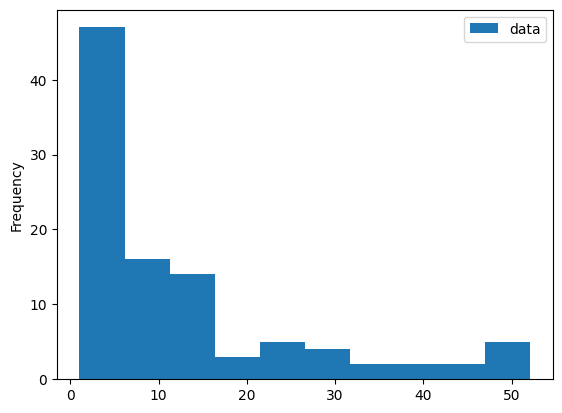

In [5]:

print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

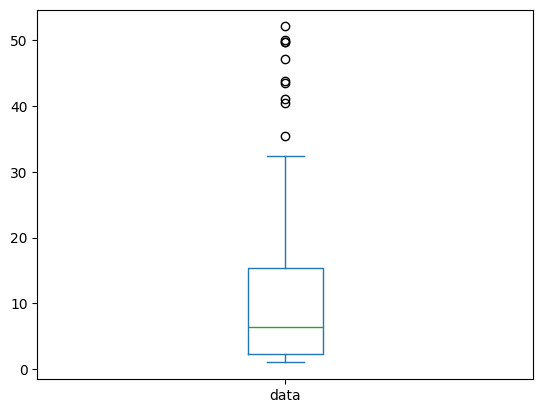

In [6]:

df.plot.box()

Histogram
Pros:

Distribution: Clearly shows the distribution of data, indicating how many data points fall into each bin.

Frequency: Provides a good sense of the frequency and range of data points.

Shape: Easy to identify the shape of the distribution (e.g., normal, skewed).

Cons:

Granularity: The choice of bin width can significantly affect the visualization; too wide or too narrow bins can obscure important details.

Outliers: Not as effective in highlighting outliers as a boxplot.

Boxplot
Pros:

Summary Statistics: Shows median, quartiles, and potential outliers succinctly.

Comparison: Great for comparing distributions between different groups.

Outliers: Effectively highlights outliers which are key to identifying the expensive drugs in this context.

Cons:

Distribution Shape: Doesn’t provide detailed insight into the distribution shape beyond quartiles.

Density: Less effective in showing the density and frequency of data points compared to a histogram.

Recommendation
Given the administrator's interest in understanding the more expensive drugs in the context of the other prices, I would choose the boxplot. It provides a clear view of summary statistics and highlights outliers, which are likely to be the more expensive drugs.

Formatting Suggestions
To make the boxplot more visually interesting and informative, consider these modifications:

Color: Use different colors for different quartiles to visually distinguish them.

Labels: Add labels for the median, quartiles, and outliers to make the information more accessible.

Annotations: Annotate the highest and lowest outliers with specific price values for quick reference.

Title: Include a descriptive title and axis labels to ensure clarity.

C:\Users\fjmrm\AppData\Local\Temp\ipykernel_38272\653916472.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="data", palette="Set3")


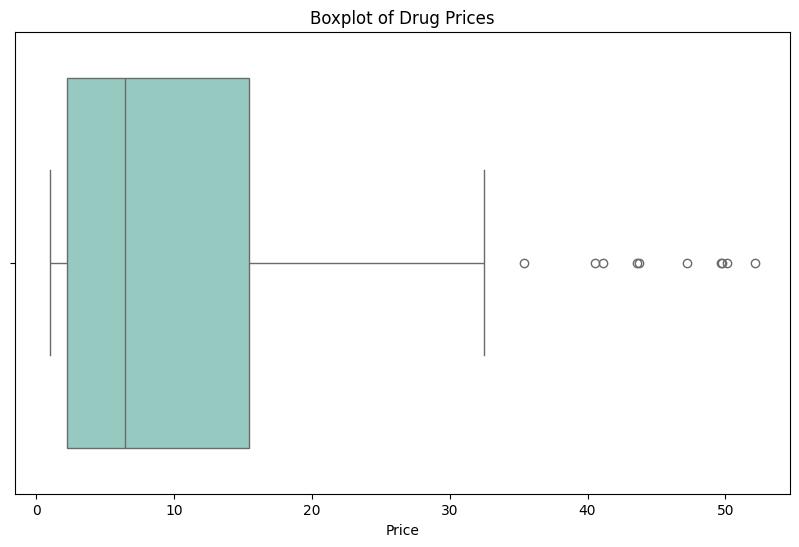

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="data", palette="Set3")
plt.title('Boxplot of Drug Prices')
plt.xlabel('Price')
plt.show()


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

PRODUCTION QUALITY DATASET

Link: https://www.kaggle.com/datasets/podsyp/production-quality 



In [8]:
X=pd.read_csv("data_X.csv")
df_X = pd.DataFrame(X)
df_X.head()

,date_time,T_data_1_1,T_data_1_2,T_data_1_3,T_data_2_1,T_data_2_2,T_data_2_3,T_data_3_1,T_data_3_2,T_data_3_3,T_data_4_1,T_data_4_2,T_data_4_3,T_data_5_1,T_data_5_2,T_data_5_3,H_data,AH_data
0,2015-01-01 00:00:00,212,210,211,347,353,347,474,473,481,346,348,355,241,241,243,167.85,9.22
1,2015-01-01 00:01:00,212,211,211,346,352,346,475,473,481,349,348,355,241,241,243,162.51,9.22
2,2015-01-01 00:02:00,212,211,211,345,352,346,476,473,481,352,349,355,242,241,242,164.99,9.22
3,2015-01-01 00:03:00,213,211,211,344,351,346,477,473,481,355,349,355,242,241,242,167.34,9.22
4,2015-01-01 00:04:00,213,211,211,343,350,346,478,473,482,358,349,355,243,241,242,163.04,9.22


In [9]:
y=pd.read_csv("data_Y.csv")
df_y = pd.DataFrame(y)
df_y.head()

,date_time,quality
0,2015-01-04 00:05:00,392
1,2015-01-04 01:05:00,384
2,2015-01-04 02:05:00,393
3,2015-01-04 03:05:00,399
4,2015-01-04 04:05:00,400


In [10]:
# Adjust the date_time columns to datetime format
df_X['date_time'] = pd.to_datetime(df_X['date_time'])
df_y['date_time'] = pd.to_datetime(df_y['date_time'])

# Merge the DataFrames based on the nearest timestamp
df = pd.merge_asof(df_X, df_y, on='date_time')

print(df)


                  date_time  T_data_1_1  T_data_1_2  T_data_1_3  T_data_2_1  \
0       2015-01-01 00:00:00         212         210         211         347   
1       2015-01-01 00:01:00         212         211         211         346   
2       2015-01-01 00:02:00         212         211         211         345   
3       2015-01-01 00:03:00         213         211         211         344   
4       2015-01-01 00:04:00         213         211         211         343   
...                     ...         ...         ...         ...         ...   
2103836 2018-12-31 23:56:00         271         261         265         353   
2103837 2018-12-31 23:57:00         271         261         265         353   
2103838 2018-12-31 23:58:00         271         261         265         353   
2103839 2018-12-31 23:59:00         271         261         265         353   
2103840 2019-01-01 00:00:00         271         261         265         353   

         T_data_2_2  T_data_2_3  T_data_3_1  T_data

In [11]:
print(df.describe())

                           date_time    T_data_1_1    T_data_1_2  \
count                        2103841  2.103841e+06  2.103841e+06   
mean   2016-12-31 11:59:59.999998976  2.501822e+02  2.500915e+02   
min              2015-01-01 00:00:00 -1.980000e+02 -1.220000e+02   
25%              2016-01-01 06:00:00  2.290000e+02  2.290000e+02   
50%              2016-12-31 12:00:00  2.500000e+02  2.500000e+02   
75%              2017-12-31 18:00:00  2.720000e+02  2.720000e+02   
max              2019-01-01 00:00:00  7.240000e+02  7.620000e+02   
std                              NaN  3.211661e+01  3.082451e+01   

         T_data_1_3    T_data_2_1    T_data_2_2    T_data_2_3    T_data_3_1  \
count  2.103841e+06  2.103841e+06  2.103841e+06  2.103841e+06  2.103841e+06   
mean   2.502536e+02  3.497756e+02  3.497218e+02  3.498282e+02  5.011611e+02   
min   -1.070000e+02 -7.030000e+02 -9.580000e+02 -1.910000e+02 -7.750000e+02   
25%    2.290000e+02  3.280000e+02  3.280000e+02  3.280000e+02  4.640000

In [12]:
df.columns

Index(['date_time', 'T_data_1_1', 'T_data_1_2', 'T_data_1_3', 'T_data_2_1',
       'T_data_2_2', 'T_data_2_3', 'T_data_3_1', 'T_data_3_2', 'T_data_3_3',
       'T_data_4_1', 'T_data_4_2', 'T_data_4_3', 'T_data_5_1', 'T_data_5_2',
       'T_data_5_3', 'H_data', 'AH_data', 'quality'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2103841 entries, 0 to 2103840
Data columns (total 19 columns):
 #   Column      Dtype         
---  ------      -----         
 0   date_time   datetime64[ns]
 1   T_data_1_1  int64         
 2   T_data_1_2  int64         
 3   T_data_1_3  int64         
 4   T_data_2_1  int64         
 5   T_data_2_2  int64         
 6   T_data_2_3  int64         
 7   T_data_3_1  int64         
 8   T_data_3_2  int64         
 9   T_data_3_3  int64         
 10  T_data_4_1  int64         
 11  T_data_4_2  int64         
 12  T_data_4_3  int64         
 13  T_data_5_1  int64         
 14  T_data_5_2  int64         
 15  T_data_5_3  int64         
 16  H_data      float64       
 17  AH_data     float64       
 18  quality     float64       
dtypes: datetime64[ns](1), float64(3), int64(15)
memory usage: 305.0 MB


In [14]:
# Check if there are any null values in the entire DataFrame
has_null = df.isnull().values.any()
has_null

np.True_

In [15]:
# Count total null values in the entire DataFrame
total_null_count = df.isnull().sum().sum()
total_null_count

np.int64(4325)

In [16]:
# Drop null values
df = df.dropna()

In [17]:
# Count total null values in the entire DataFrame
total_null_count = df.isnull().sum().sum()
total_null_count

np.int64(0)

In [18]:
# Find duplicate rows
duplicates = df.duplicated()
duplicates

4325       False
4326       False
4327       False
4328       False
4329       False
           ...  
2103836    False
2103837    False
2103838    False
2103839    False
2103840    False
Length: 2099516, dtype: bool

In [19]:
# View duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [date_time, T_data_1_1, T_data_1_2, T_data_1_3, T_data_2_1, T_data_2_2, T_data_2_3, T_data_3_1, T_data_3_2, T_data_3_3, T_data_4_1, T_data_4_2, T_data_4_3, T_data_5_1, T_data_5_2, T_data_5_3, H_data, AH_data, quality]
Index: []


In [20]:
# Calculate mean, median, and mode for each column
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]

# Display the results
print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nMode values:\n", mode_values)

Mean values:
 date_time     2017-01-02 00:02:29.999997440
T_data_1_1                       250.150338
T_data_1_2                       250.052049
T_data_1_3                       250.217416
T_data_2_1                       349.792084
T_data_2_2                       349.740907
T_data_2_3                        349.84831
T_data_3_1                       501.129659
T_data_3_2                       501.073775
T_data_3_3                       501.192203
T_data_4_1                       349.313825
T_data_4_2                       349.459849
T_data_4_3                       350.036543
T_data_5_1                        249.75222
T_data_5_2                        249.61454
T_data_5_3                        249.69383
H_data                           174.744333
AH_data                            7.499197
quality                          411.298758
dtype: object

Median values:
 date_time     2017-01-02 00:02:30
T_data_1_1                  250.0
T_data_1_2                  250.0
T_data_1_3       

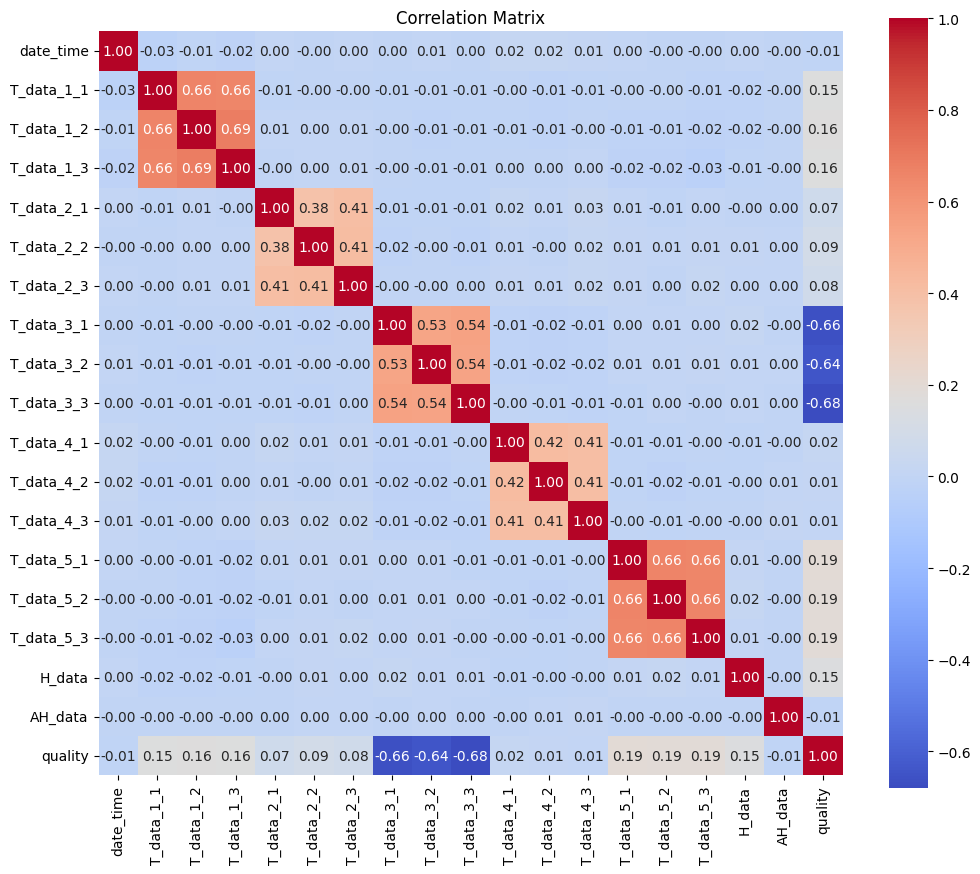

In [21]:

#Correlation Matrix
# Load Data
data_X = pd.read_csv('data_X.csv')
data_Y = pd.read_csv('data_Y.csv')

# Convert date_time columns to datetime
data_X['date_time'] = pd.to_datetime(data_X['date_time'])
data_Y['date_time'] = pd.to_datetime(data_Y['date_time'])

# Merge datasets
merged_data = pd.merge(data_X, data_Y, on='date_time', how='outer')

# Calculate correlation matrix
corr_matrix = merged_data.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


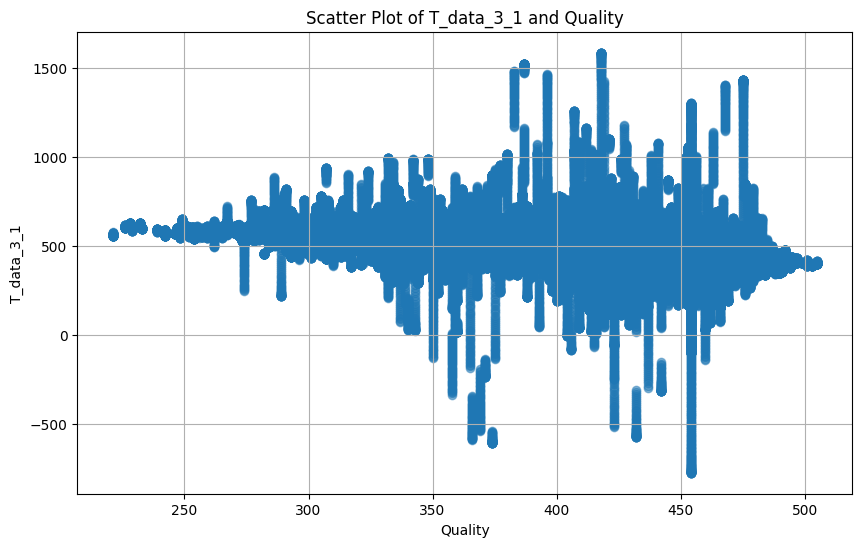

In [22]:
#Scatter Plot of the three most correlated columns with the quality column.


# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['quality'], df['T_data_3_1'], alpha=0.5)
plt.ylabel('T_data_3_1')
plt.xlabel('Quality')
plt.title('Scatter Plot of T_data_3_1 and Quality')
plt.grid(True)
plt.show()


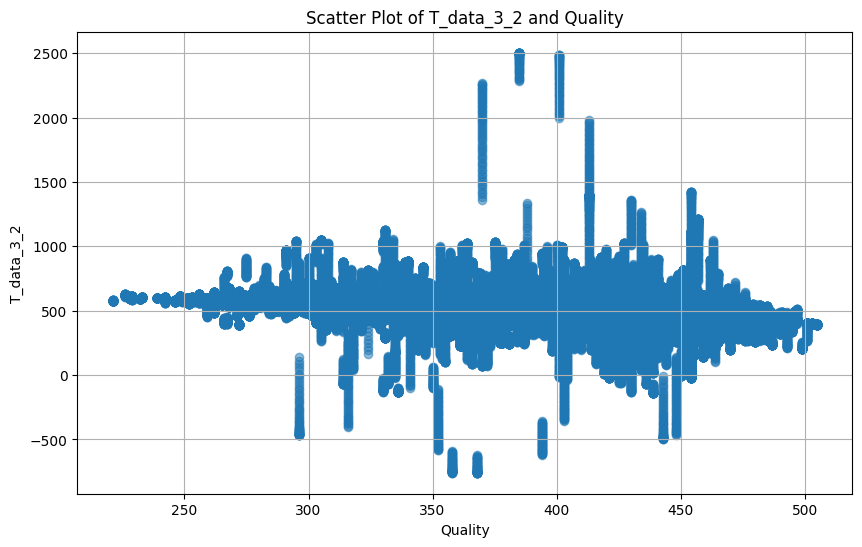

In [23]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['quality'], df['T_data_3_2'], alpha=0.5)
plt.ylabel('T_data_3_2')
plt.xlabel('Quality')
plt.title('Scatter Plot of T_data_3_2 and Quality')
plt.grid(True)
plt.show()

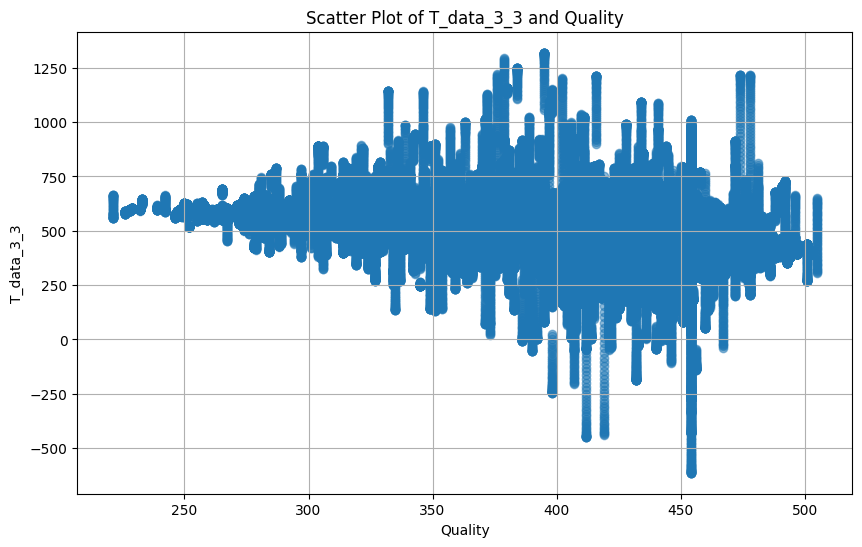

In [24]:
# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['quality'], df['T_data_3_3'], alpha=0.5)
plt.ylabel('T_data_3_3')
plt.xlabel('Quality')
plt.title('Scatter Plot of T_data_3_3 and Quality')
plt.grid(True)
plt.show()

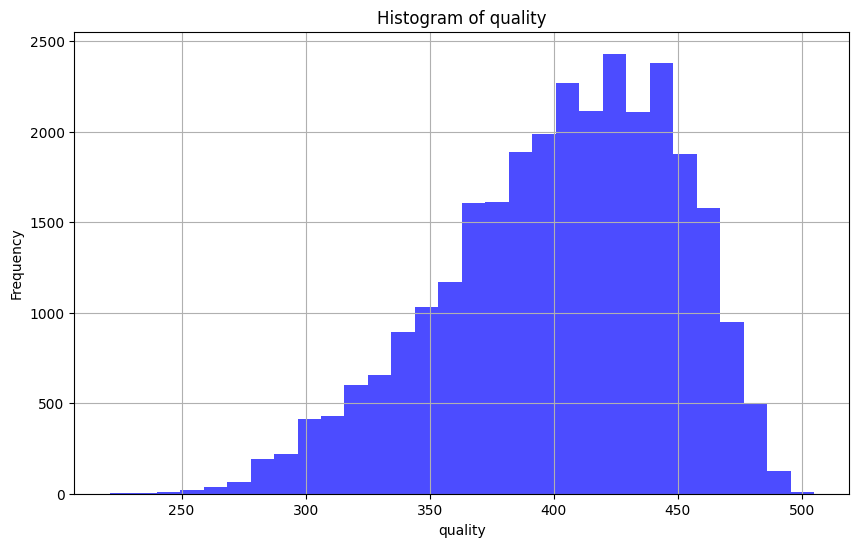

In [25]:
#Histogram of teh quality column


# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_Y['quality'], bins=30, alpha=0.7, color='blue')
plt.xlabel('quality')
plt.ylabel('Frequency')
plt.title('Histogram of quality')
plt.grid(True)
plt.show()


C:\Users\fjmrm\AppData\Local\Temp\ipykernel_38272\2015896364.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_Y['quality'], shade=True, color='purple')


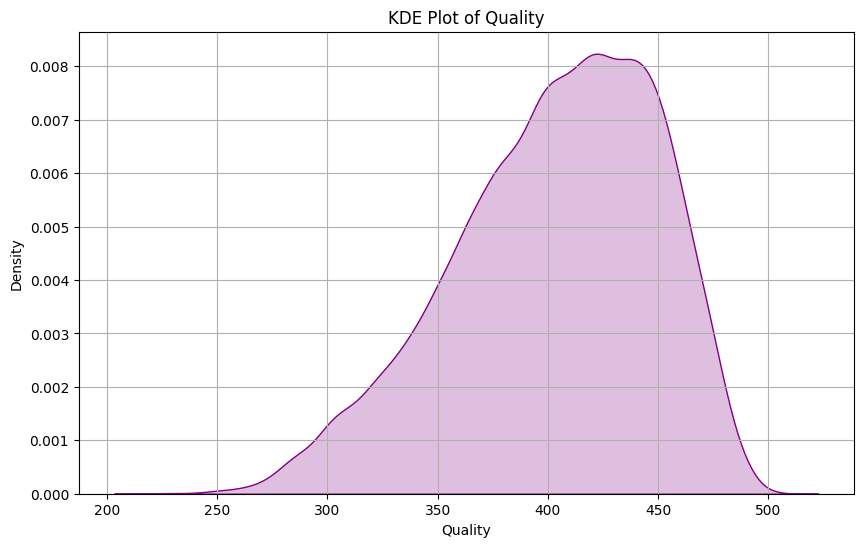

In [26]:
#KDE plot of the quality column
# Plot KDE

plt.figure(figsize=(10, 6))
sns.kdeplot(data_Y['quality'], shade=True, color='purple')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.title('KDE Plot of Quality')
plt.grid(True)
plt.show()

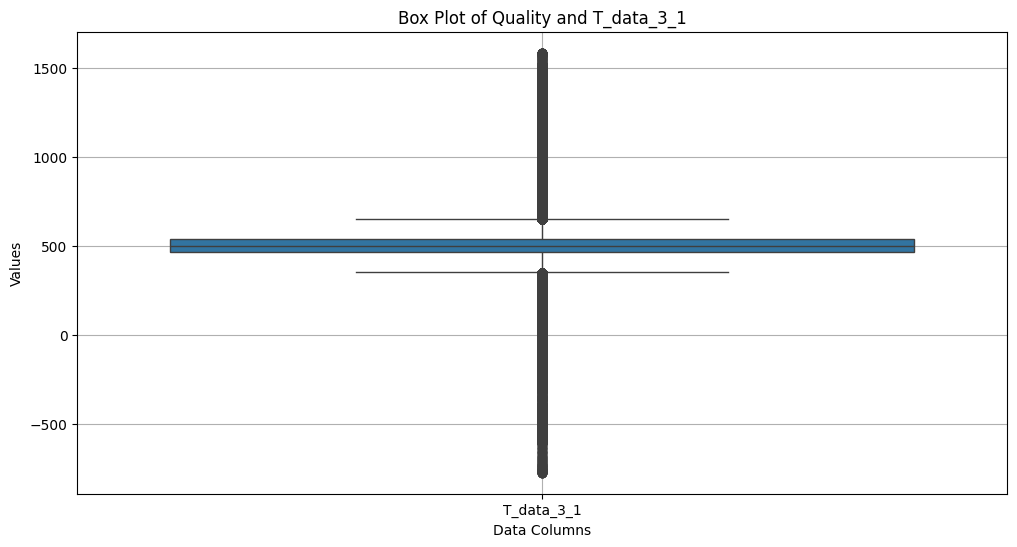

In [27]:
#Box plot T_data_3_1 vs quality



# Melt the dataframe to have a long-format for sns.boxplot
melted_data = pd.melt(df, id_vars=['date_time', 'quality'], value_vars=['T_data_3_1'])

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=melted_data)
plt.xlabel('Data Columns')
plt.ylabel('Values')
plt.title('Box Plot of Quality and T_data_3_1')
plt.grid(True)
plt.show()


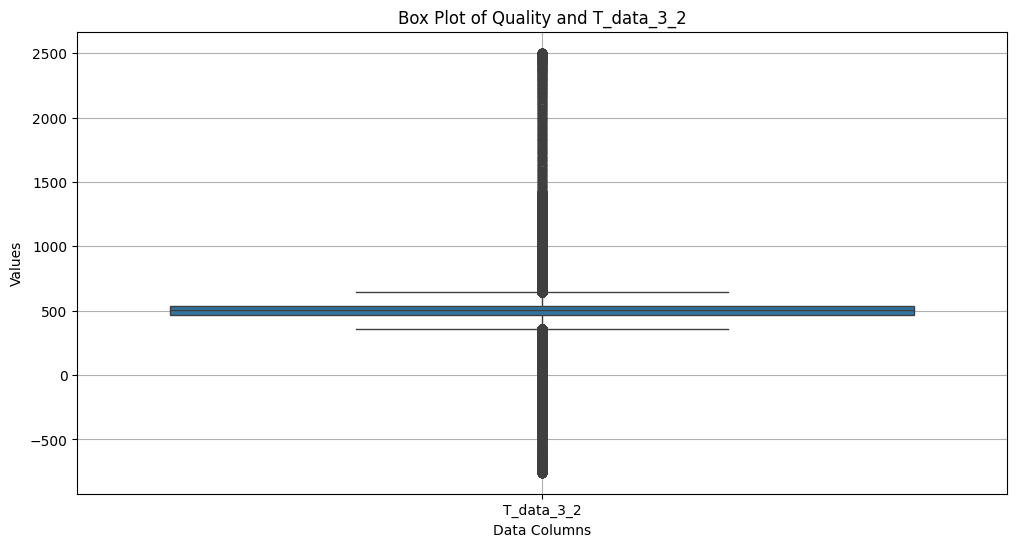

In [28]:
#Box plot T_data_3_2 vs quality



# Melt the dataframe to have a long-format for sns.boxplot
melted_data = pd.melt(df, id_vars=['date_time', 'quality'], value_vars=['T_data_3_2'])

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=melted_data)
plt.xlabel('Data Columns')
plt.ylabel('Values')
plt.title('Box Plot of Quality and T_data_3_2')
plt.grid(True)
plt.show()

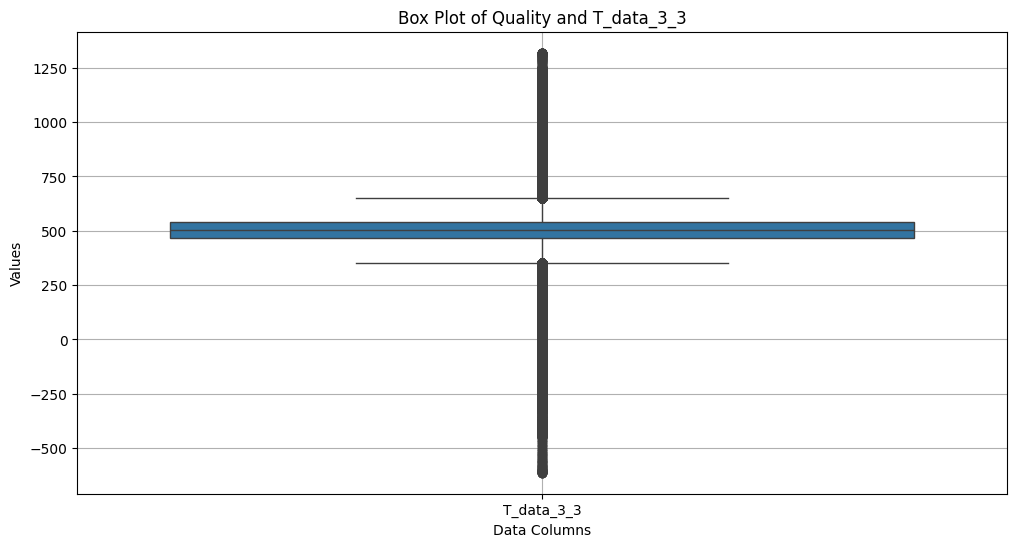

In [29]:
#Box plot T_data_3_3 vs quality



# Melt the dataframe to have a long-format for sns.boxplot
melted_data = pd.melt(df, id_vars=['date_time', 'quality'], value_vars=['T_data_3_3'])

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=melted_data)
plt.xlabel('Data Columns')
plt.ylabel('Values')
plt.title('Box Plot of Quality and T_data_3_3')
plt.grid(True)
plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

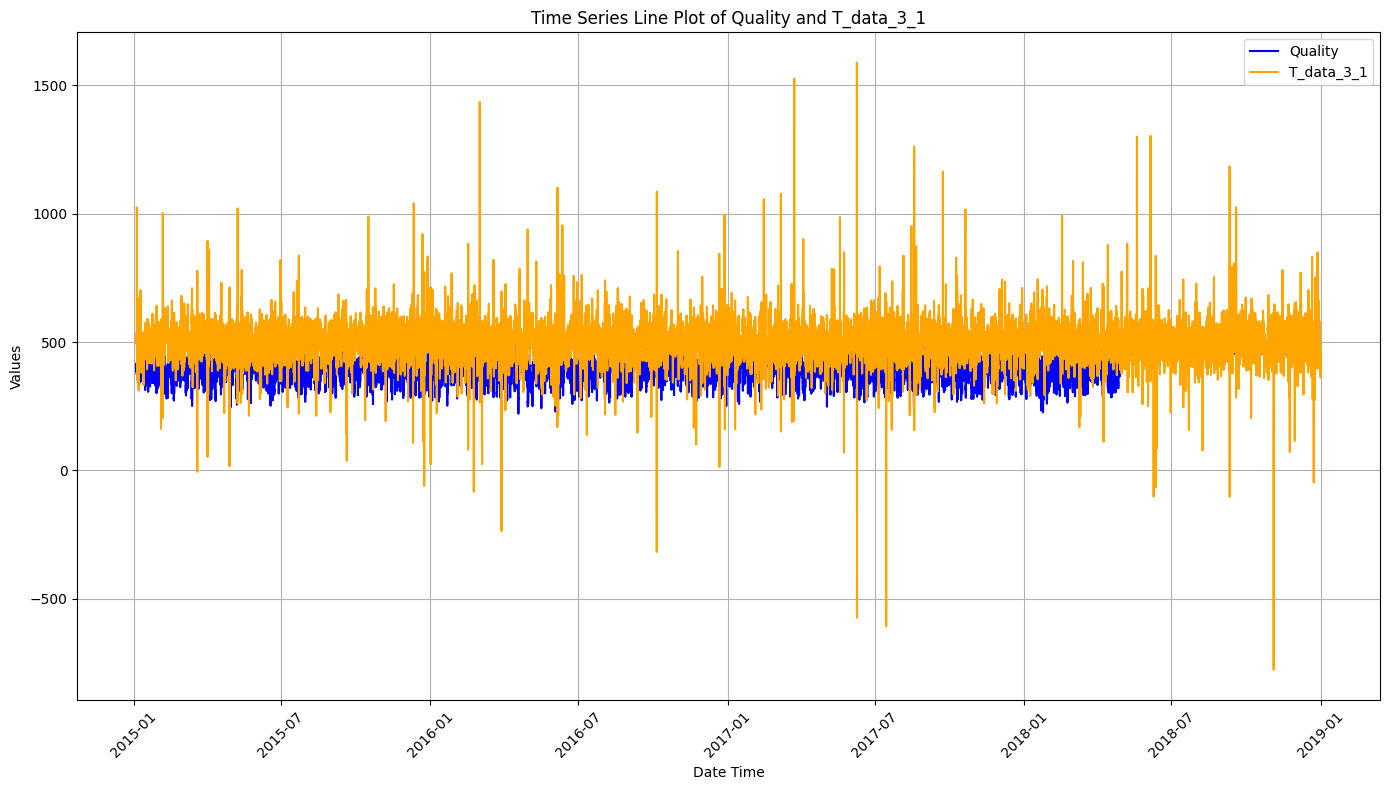

In [30]:
import matplotlib.pyplot as plt

# Plot time series line plot
plt.figure(figsize=(14, 8))
plt.plot(df['date_time'], df['quality'], label='Quality', color='blue')
plt.plot(df['date_time'], df['T_data_3_1'], label='T_data_3_1', color='orange')

plt.xlabel('Date Time')
plt.ylabel('Values')
plt.title('Time Series Line Plot of Quality and T_data_3_1')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


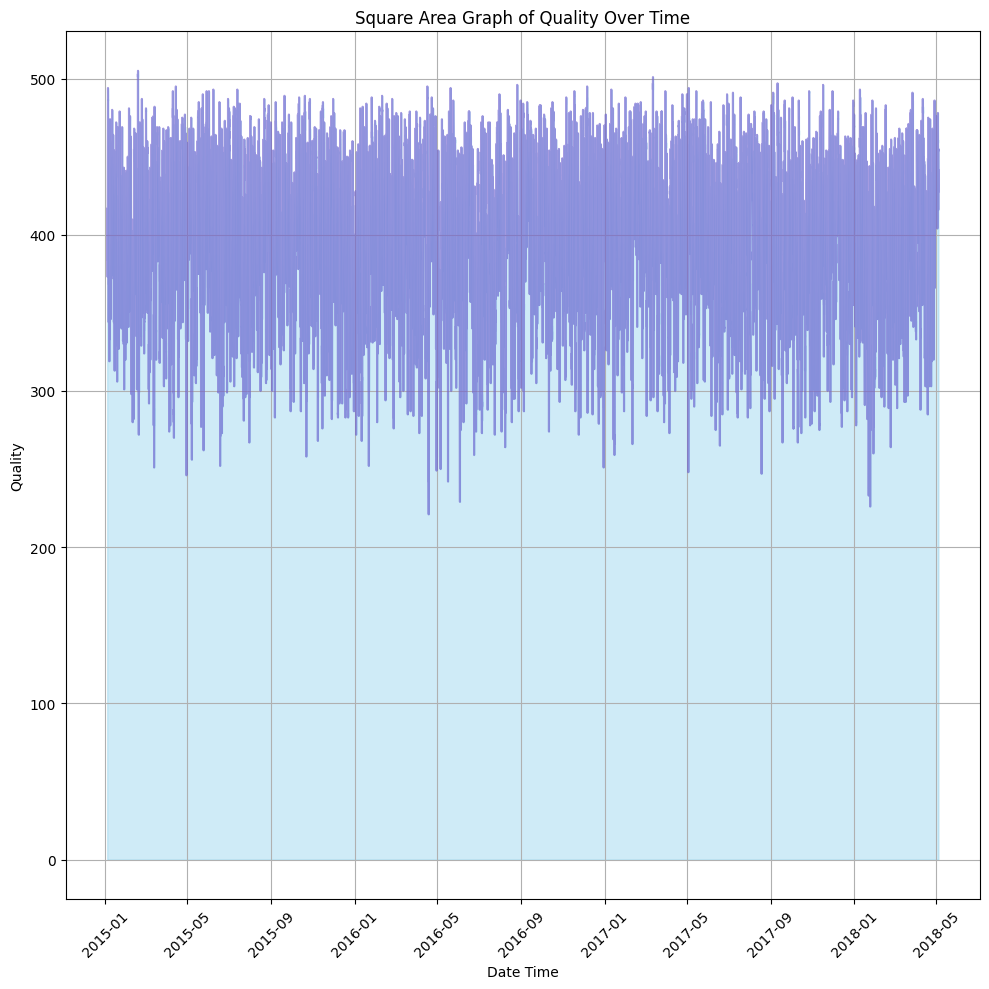

In [31]:


# Convert date_time column to datetime
data_Y['date_time'] = pd.to_datetime(data_Y['date_time'])

# Plot area graph
plt.figure(figsize=(10, 10))
plt.fill_between(data_Y['date_time'], data_Y['quality'], color='skyblue', alpha=0.4)
plt.plot(data_Y['date_time'], data_Y['quality'], color='Slateblue', alpha=0.6)
plt.xlabel('Date Time')
plt.ylabel('Quality')
plt.title('Square Area Graph of Quality Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
